In [1]:
import gpytorch
import numpy as np
import pandas as pd
import torch

# from bo_functions_GP_Analysis import test_train_split
from bo_functions_GP_Analysis import LSO_LOO_Analysis
from datetime import datetime

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
#Set Date and Time
dateTimeObj = datetime.now()
timestampStr = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S)")
print("Date and Time: ", timestampStr)
# DateTime = dateTimeObj.strftime("%Y/%m/%d/%H-%M-%S%p")
DateTime = None ##For Testing

#Set Parameters
Theta_True = np.array([1,-1])
BO_iters = 1
train_iter = 300
noise_std = 0.1
explore_bias = torch.tensor([1])
shuffle_seed = 6
set_lengthscale = None
emulator = False
sparse_grid = True
save_fig=False
len_data = 20
# len_data = 100

#Pull Experimental data from CSV
exp_data_doc = 'Input_CSVs/Exp_Data/n=5.csv'
exp_data = np.array(pd.read_csv(exp_data_doc, header=0,sep=","))
Xexp = exp_data[:,1]
Yexp = exp_data[:,2]
n = len(Xexp)

#Define GP Testing space
p=20
Theta1 =  np.linspace(-2,2,p) #1x10
Theta2 =  np.linspace(-2,2,p) #1x10
theta_mesh = np.array(np.meshgrid(Theta1, Theta2)) #2 Uniform 5x5 arrays

Date and Time:  08-Sep-2022 (10:02:51)


Lengthscale Set To: None
Explore Bias: 1.0
Train/Test Separation Factor 0.95


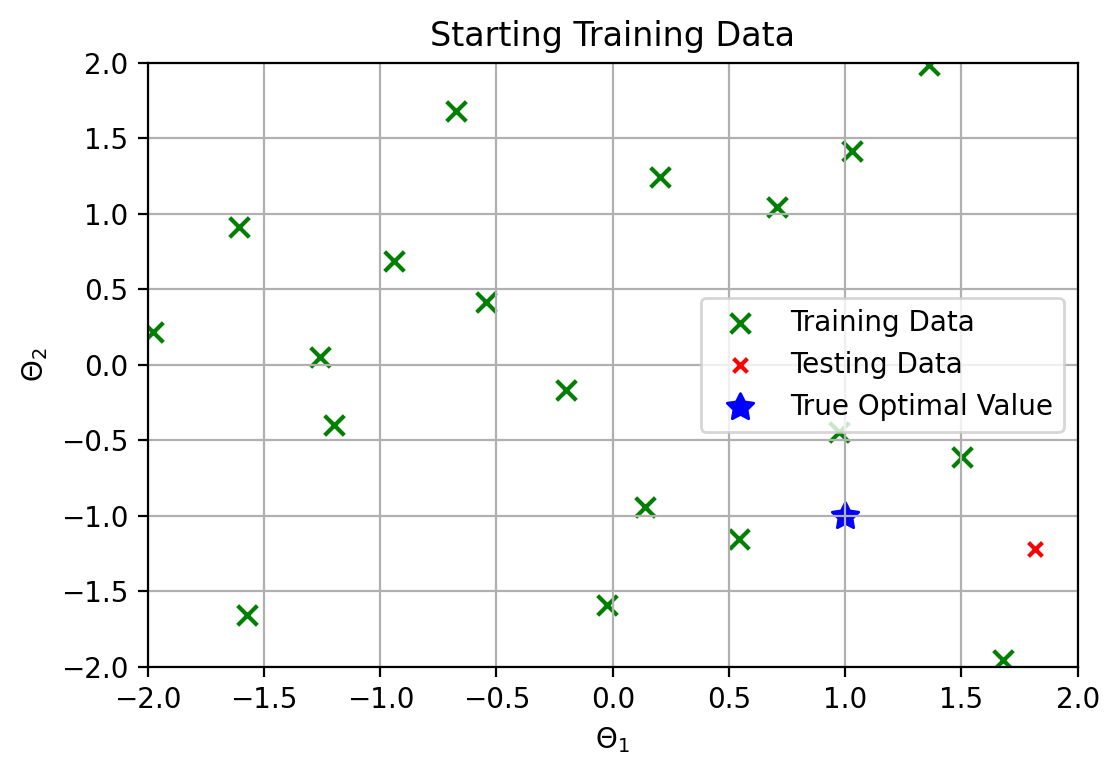

RuntimeError: Sizes of tensors must match except in dimension 0. Expected size 2 but got size 3 for tensor number 1 in the list.

In [8]:
%%time
obj = "obj"

LOO = False
LSO = True
verbose = True

print("Lengthscale Set To:", set_lengthscale)
print("Explore Bias:", str(np.round(float(explore_bias[0]),3)))
results = LSO_LOO_Analysis(theta_mesh,Theta_True,train_iter,explore_bias[0], Xexp, Yexp,
                                 noise_std, obj, sparse_grid, emulator, set_lengthscale, len_data, verbose, 
                                 save_fig, shuffle_seed, DateTime, LOO, LSO)